<a href="https://colab.research.google.com/github/HeptaDecane/LP2_SEM7/blob/main/A02/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://raw.githubusercontent.com/HeptaDecane/LP2_SEM7/main/A02/Cars.csv --output Cars.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8455  100  8455    0     0   175k      0 --:--:-- --:--:-- --:--:--  175k


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Cars.csv')
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [4]:
x = df.drop(columns=['brand'])
x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [5]:
x = x.apply(pd.to_numeric, errors='coerce')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.4 KB


In [6]:
for col in x.columns:
    x[col] = x[col].fillna(int(x[col].mean()))
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.4 KB


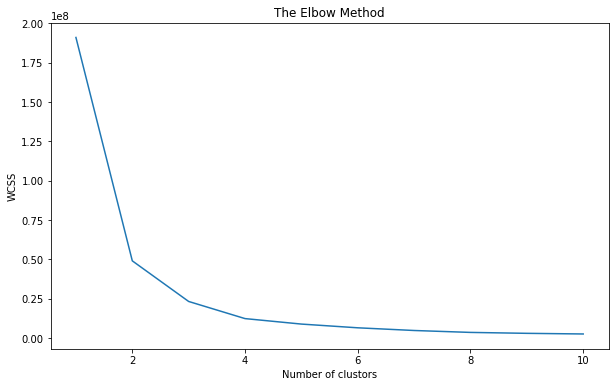

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

fig, axs = plt.subplots(figsize=(10,6))
axs.set_title('The Elbow Method')
axs.set_xlabel('Number of clustors')
axs.set_ylabel('WCSS')
sns.lineplot(x=range(1,11),y=wcss)

In [8]:
model = KMeans(n_clusters=3) 
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
model.cluster_centers_

array([[2.02012346e+01, 6.11111111e+00, 2.24716049e+02, 1.09074074e+02,
        3.19348148e+03, 1.56790123e+01, 1.97671605e+03],
       [2.95466102e+01, 4.05084746e+00, 1.07669492e+02, 7.70338983e+01,
        2.24153390e+03, 1.66101695e+01, 1.97771186e+03],
       [1.48064516e+01, 7.83870968e+00, 3.47274194e+02, 1.58629032e+02,
        4.23211290e+03, 1.33548387e+01, 1.97525806e+03]])

In [10]:
model.labels_

array([2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0],
      dtype=int32)

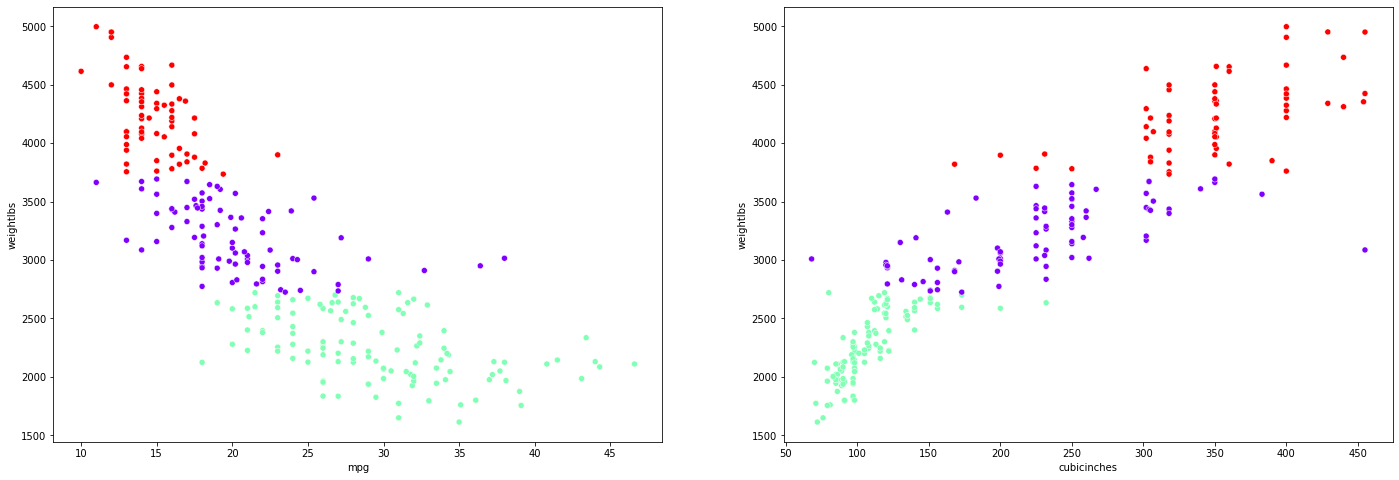

In [11]:
fig, axs = plt.subplots(1,2, figsize=(24,8))
sns.scatterplot(x=x['mpg'],y=x['weightlbs'],c=model.labels_,cmap='rainbow', ax=axs[0])
sns.scatterplot(x=x['cubicinches'],y=x['weightlbs'],c=model.labels_,cmap='rainbow', ax=axs[1])

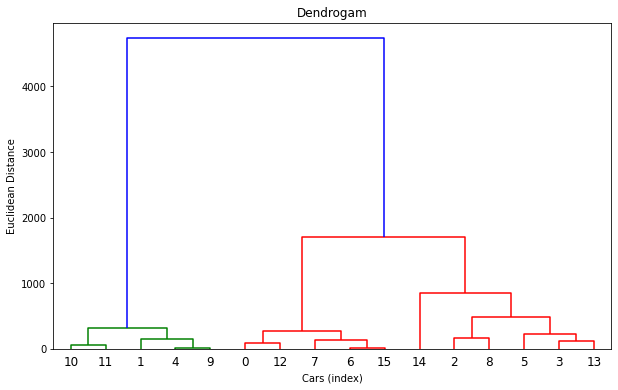

In [12]:
import scipy.cluster.hierarchy as sch

fig, axs = plt.subplots(figsize=(10,6))
axs.set_title('Dendrogam')
axs.set_xlabel('Cars (index)')
axs.set_ylabel('Euclidean Distance')
dendogram = sch.dendrogram(sch.linkage(x.loc[0:15],method='ward'), ax=axs)

In [13]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)
model.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [14]:
model.labels_

array([0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0,
       2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0,
       2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2,
       2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0])

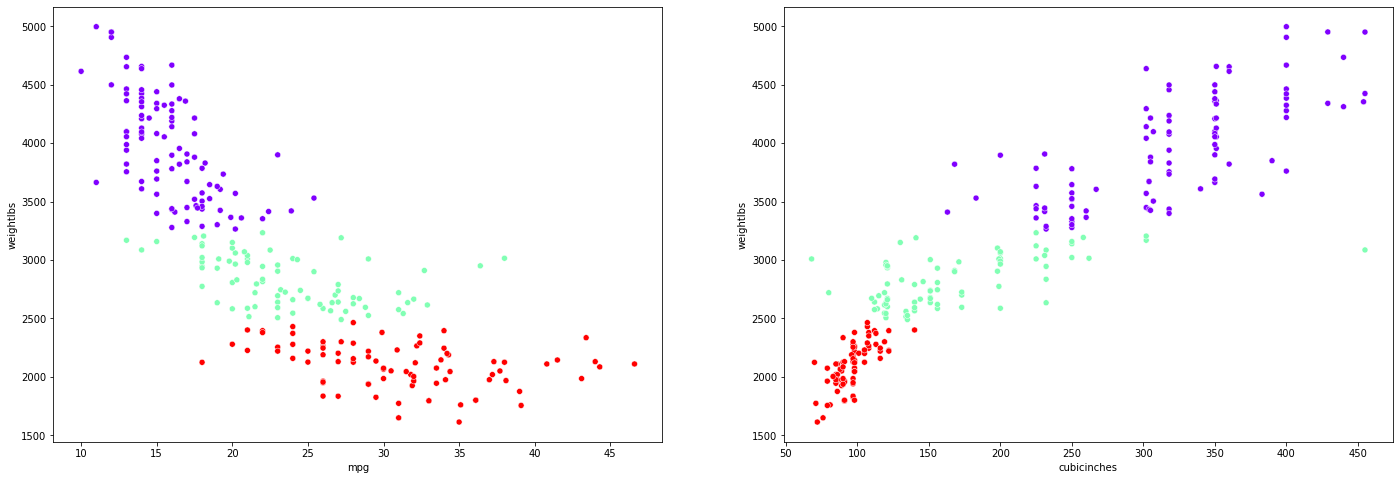

In [15]:
fig, axs = plt.subplots(1,2, figsize=(24,8))
sns.scatterplot(x=x['mpg'],y=x['weightlbs'],c=model.labels_,cmap='rainbow', ax=axs[0])
sns.scatterplot(x=x['cubicinches'],y=x['weightlbs'],c=model.labels_,cmap='rainbow', ax=axs[1])